In [37]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# [Contour Properties](https://docs.opencv.org/3.4/d1/d32/tutorial_py_contour_properties.html)

In [35]:
img = cv.imread('../img/litning.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

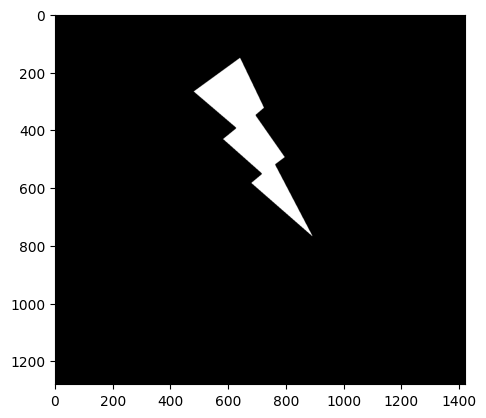

In [36]:
plt.imshow(img, cmap="gray")

In [6]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

0.6655844155844156

In [7]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.25706366803927777

In [8]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.7667389032246635

In [9]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

np.float64(287.5131374431188)

In [10]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)

In [11]:
mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)
pixelpoints

array([[152, 638],
       [152, 639],
       [153, 637],
       ...,
       [766, 888],
       [767, 888],
       [767, 889]])

In [13]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img,mask = mask)

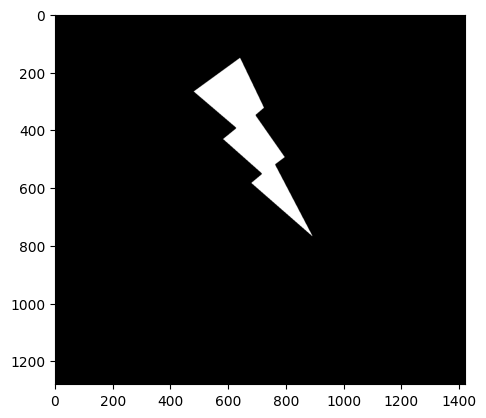

In [17]:
plt.imshow(img, cmap="gray")

In [15]:
mean_val = cv.mean(img,mask = mask)
mean_val

(255.0, 0.0, 0.0, 0.0)

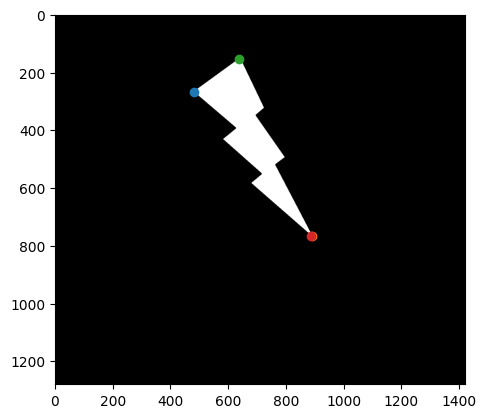

In [22]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

plt.imshow(img, cmap="gray")
plt.scatter(*leftmost)
plt.scatter(*rightmost)
plt.scatter(*topmost)
plt.scatter(*bottommost)

# [Contours : More Functions](https://docs.opencv.org/3.4/d5/d45/tutorial_py_contours_more_functions.html)

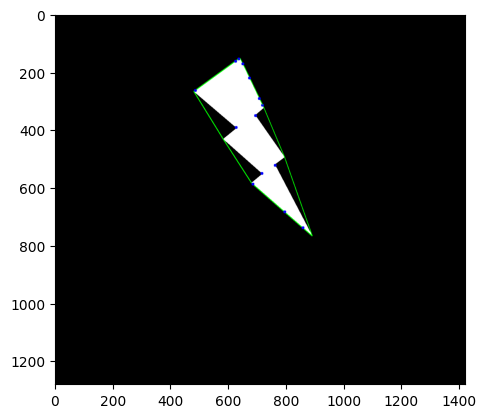

In [7]:
img = cv.imread('../img/litning.png')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)

plt.imshow(img)


In [9]:
dist = cv.pointPolygonTest(cnt,(50,50),True)
dist

-481.65236426285713

Matching img1 and img1:  0.0
Matching img1 and img2:  5.261323622555921
Matching img2 and img2:  0.0


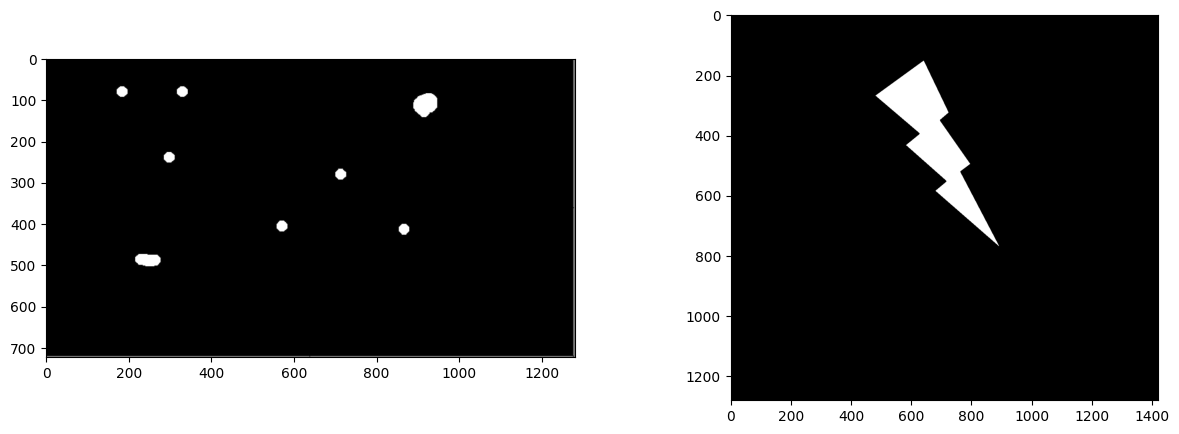

In [16]:
img1 = cv.imread('../img/dots.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../img/litning.png', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
print("Matching img1 and img1: ", cv.matchShapes(cnt1,cnt1,1,0.0))
print("Matching img1 and img2: ", cv.matchShapes(cnt1,cnt2,1,0.0))
print("Matching img2 and img2: ", cv.matchShapes(cnt2,cnt2,1,0.0))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].imshow(img1, cmap="gray")
ax[1].imshow(img2, cmap="gray")
plt.show()

# [Template Matching](https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html)

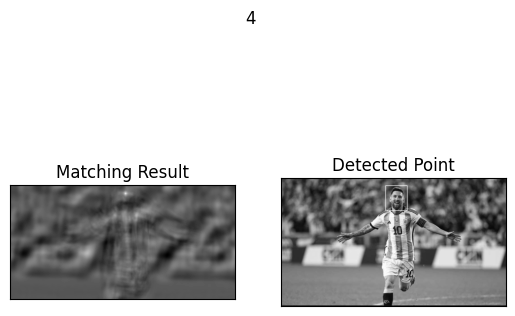

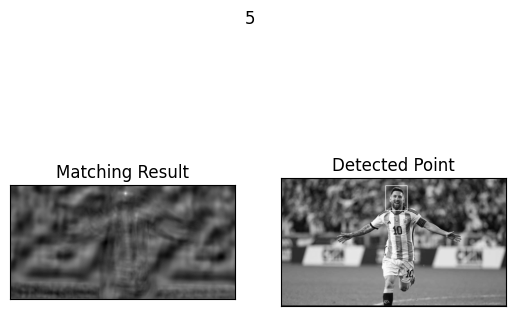

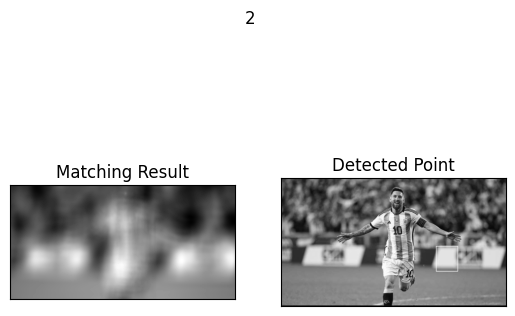

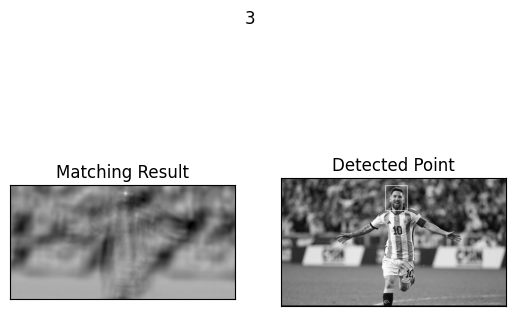

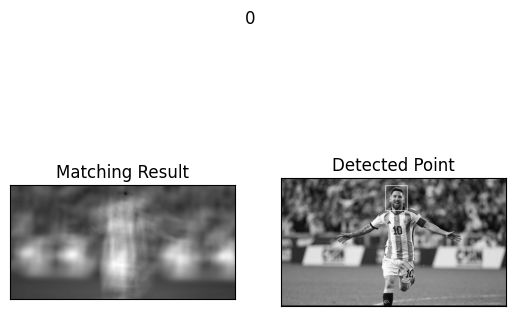

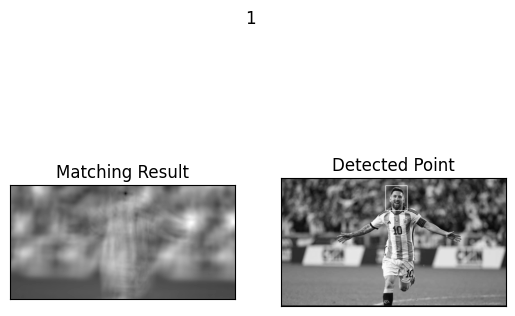

In [34]:
img = cv.imread('../img/messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('../img/messi_temp.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = [cv.TM_CCOEFF, 
           cv.TM_CCOEFF_NORMED, 
           cv.TM_CCORR,
            cv.TM_CCORR_NORMED, 
            cv.TM_SQDIFF, 
            cv.TM_SQDIFF_NORMED
            ]
for meth in methods:
    img = img2.copy()
    method = meth
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

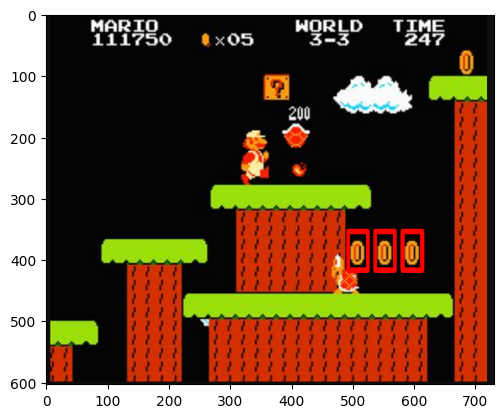

In [47]:
img_rgb = cv.imread('../img/mario.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('../img/mario_coin.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb[...,::-1])

In [44]:
img_rgb.shape

(603, 731, 3)